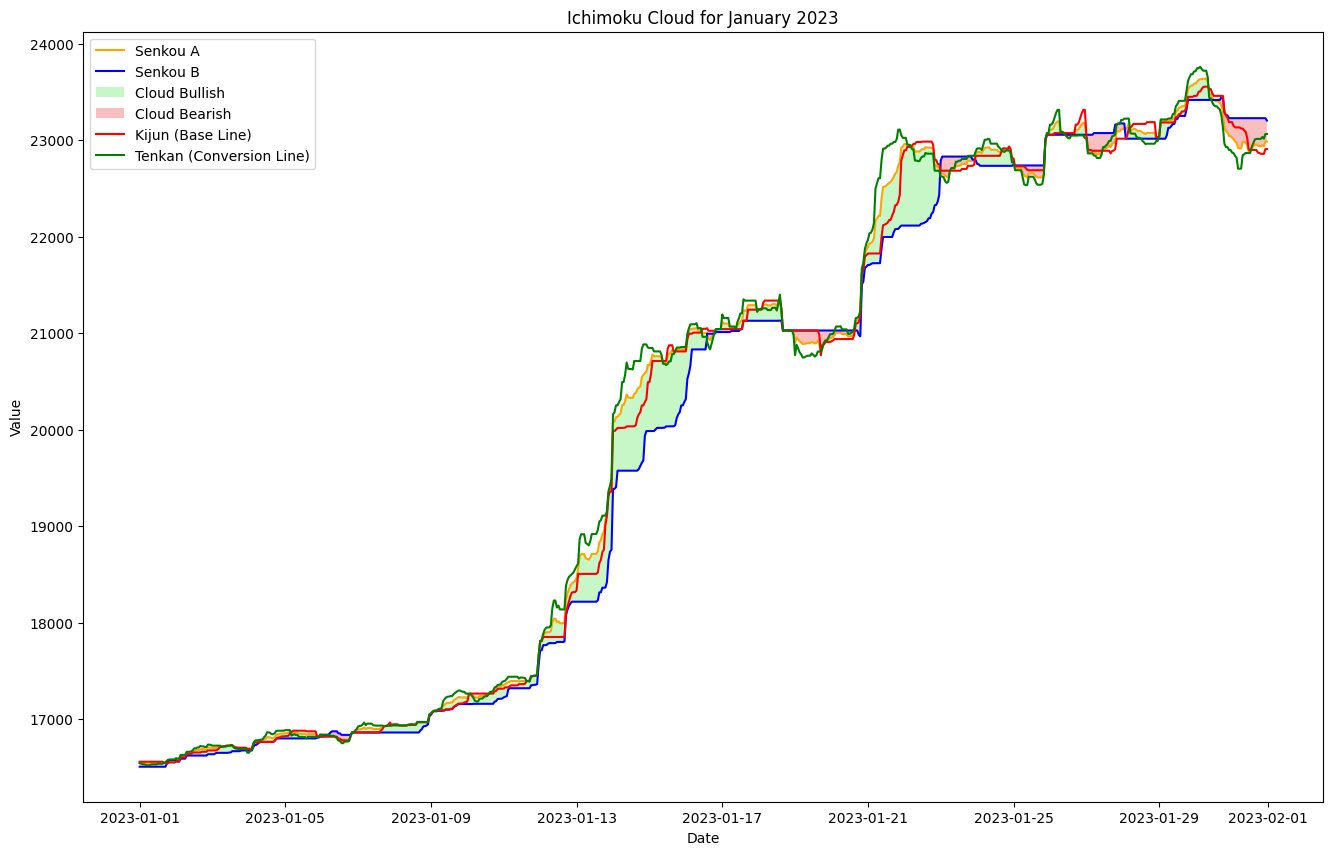

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ta
import ta.trend

# Load data
df = pd.read_csv("BTC-USDT.csv")
df["date"] = pd.to_datetime(df["date"], unit="ms")
df = df.set_index(df["date"])
del df["date"]

# Calculate Ichimoku components
df['senkou_A'] = ta.trend.ichimoku_a(high=df["high"], low=df["low"])
df['senkou_B'] = ta.trend.ichimoku_b(high=df["high"], low=df["low"])
df['kijun'] = ta.trend.ichimoku_base_line(high=df["high"], low=df["low"])
df['tenkan'] = ta.trend.ichimoku_conversion_line(high=df["high"], low=df["low"])

# Filter for January 2023
df_jan_2023 = df[(df.index.year == 2023) & (df.index.month == 1)]

# Plotting the Ichimoku Cloud for January 2023
plt.figure(figsize=(16, 10))

# Plot Senkou A and Senkou B
plt.plot(df_jan_2023.index, df_jan_2023['senkou_A'], label='Senkou A', color='orange')
plt.plot(df_jan_2023.index, df_jan_2023['senkou_B'], label='Senkou B', color='blue')

# Fill the area between Senkou A and Senkou B
plt.fill_between(df_jan_2023.index, df_jan_2023['senkou_A'], df_jan_2023['senkou_B'], 
                 where=df_jan_2023['senkou_A'] >= df_jan_2023['senkou_B'], facecolor='lightgreen', interpolate=True, alpha=0.5, label='Cloud Bullish')
plt.fill_between(df_jan_2023.index, df_jan_2023['senkou_A'], df_jan_2023['senkou_B'], 
                 where=df_jan_2023['senkou_A'] < df_jan_2023['senkou_B'], facecolor='lightcoral', interpolate=True, alpha=0.5, label='Cloud Bearish')

# Plot Kijun (Base Line) and Tenkan (Conversion Line)
plt.plot(df_jan_2023.index, df_jan_2023['kijun'], label='Kijun (Base Line)', color='red')
plt.plot(df_jan_2023.index, df_jan_2023['tenkan'], label='Tenkan (Conversion Line)', color='green')

# Add labels and legend
plt.title('Ichimoku Cloud for January 2023')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')

# Show plot
plt.show()